<a href="https://colab.research.google.com/github/Mhoover41/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Project_Melissa_Hoover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**


- **Author:** Melissa Hoover

#**Project Overview**

The purpose of this project is to help retailers increase sales by predicting food items sold at various stores and better understand what affects the sales.

##Data Dictionary

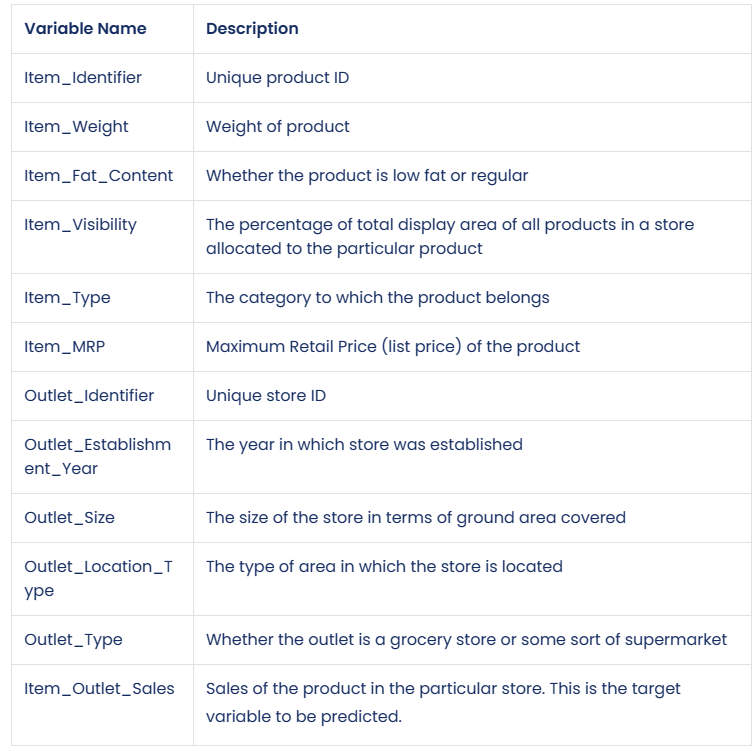

#**Load and Inspect Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### **Imports**

In [101]:
#Import libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import pandas as pd
import numpy as np
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

##### **Loading Data**

In [3]:
#Load the data file
filename= '/content/drive/MyDrive/Data sets/sales_predictions.csv'
df= pd.read_csv(filename)

**Inspecting Data**

In [4]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


  How many Rows/Columns:

In [5]:
# Display the number of rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 8523 rows, and 12 columns
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.


  - There are 8523 rows and 12 columns

##### **Display Column Names, Count of Non-Null Values, and Data Types**

In [6]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#**Clean Data**

   

Checking the data types:

In [7]:
# Display data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- The dataset has a combination of categorical (object) and numeric (float and int) data types.
- No mismatched data types were found.

Identifying missing values:

In [8]:
#Display total number of missing values
missing_values= df.isna().sum().sum()
print(f"Total number of missing values is {missing_values}")

Total number of missing values is 3873


In [9]:
# Display the count of missing values for each column
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Display the percentage of missing values for each column
df.isna().sum()/len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

There are 17% missing values in Item Weight column.  I have decided to use the median for that column as median is less affected by outliers than the mean.

In [11]:
# Fill in median item weight for all missing values in item weight column
median_item_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_item_weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Since the percent missing is 28% in Outlet Size column, I have decided to fill that in with "Unknown" value instead of dropping the column.

In [12]:
#Fill in Outlet size column with 'Unknown' value
df['Outlet_Size'].fillna('Unknown', inplace=True)

Used unique() to see what the new values of the column are to make sure Unknown is there.


In [13]:
#Check to see what the new values of the Outlet Size column are and confirming Unknown is listed
df['Outlet_Size'].unique()

array(['Medium', 'Unknown', 'High', 'Small'], dtype=object)

Checked isna().sum again to make sure there are no missing values now with the changes I made.

In [14]:
#Check again to make sure there are no missing values with the changes that were made
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Checking for duplicate data:
  - There are no duplicate values 

In [15]:
# Display duplicate values
duplicated_values = df.duplicated().sum()

print(f"Total number of duplicated values is {duplicated_values}")

Total number of duplicated values is 0


## Categorical Columns
- Check for inconsistencies in all columns that are object data types


In [16]:
from scipy.sparse import data
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [17]:
## Display the index of object datatypes
object_data_types.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [18]:
## Loop through the object datatype columns
for column in object_data_types.index:
    ## Print the column name
    print(column)
    ## Print the unique values from the column
    print(df[column].unique())
    ## Print a blank row
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




###'Item Identifier' Column

In [19]:
## Display the unique values from the column
print(df['Item_Identifier'].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


In [20]:
# Display Item Identifier value counts to look for any inconsistencies
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

- No issues noted with Item Identifier column.

###'Item Fat Content' Column

In [21]:
## Display the unique values from the column
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [22]:
#Display Item Fat Content value counts to look for any inconsistencies
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fixing Inconsistencies in values in Fat Content column:
  - Updated LF to Low Fat
  - Updated low fat to Low Fat
  - Updated reg to Regular

In [23]:
# Replace LF to Low Fat, low fat to Low Fat, reg to Regular in Item Fat Content column
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [24]:
#Check value counts again to view the changes made
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###'Item Type' Column

In [25]:
## Display the unique values from the column
print(df['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [26]:
# Display Item Type value counts to look for any inconsistencies
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

- No issues noted with Item Type column.

###'Outlet Identifier' Column

In [27]:
## Display the unique values from the column
print(df['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


In [28]:
# Display Outlet Identifier value counts to look for any inconsistencies
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

- No issues noted with Outlet Identifier column.

### 'Outlet Size' Column

In [29]:
## Display the unique values from the column
print(df['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']


In [30]:
# Display outlet size value counts to look for any inconsistencies
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

- No issues noted with Outlook size column.

###'Outlet Location Type' Column

In [31]:
## Display the unique values from the column
print(df['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']


In [32]:
# Display outlet location type value counts to look for any inconsistencies
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

- No issues noted with Outlet Location type column.

###'Outlet Type' Column

In [33]:
## Display the unique values from the column
print(df['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [34]:
# Display outlet type value counts to look for any inconsistencies
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

- No issues noted with Outlet Type column.

##Numerical Columns
- Check for inconsistencies in all columns that are Integer or Float data types
- Check for unusual or impossible values.
- Check for Outliers

In [35]:
## Display the descriptive statistics for the numeric columns
df.describe(include= 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


Display Statistics Summary for each numerical column:

###'Item Weight' Column

In [36]:
#Display Item Weight summary statistics
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

###'Item Visibility' Column

In [37]:
#Display Item Visibility summary statistics
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

###'Item MRP' Column

In [38]:
#Display Item MRP summary statistics
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

###'Item Outlet Sales' Column

In [39]:
# Display Item Outlet Sales summary statistics
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

# **Exploratory Data Analysis**

##Numerical Columns



- For each numeric column, we will visualize the distribution with a histogram and boxplot.

In [40]:
#Display the descriptive statistics for the numeric columms 
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


###'Item Weight' Column

In [41]:
#Display the descriptive statistics for the column
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

- 'Item Weight' Histogram

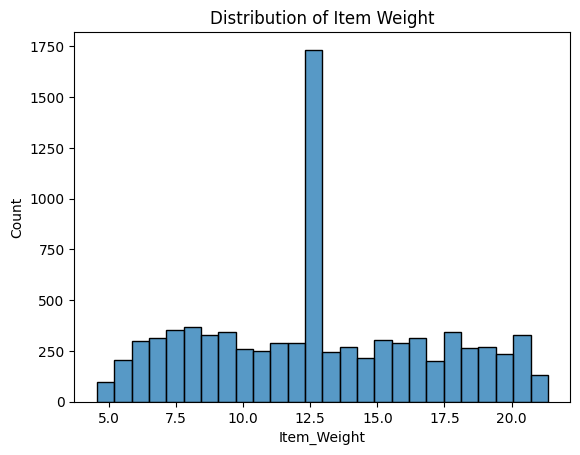

In [42]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='Item_Weight')

# Add a title
ax.set_title('Distribution of Item Weight');

- 'Item Weight' Boxplot

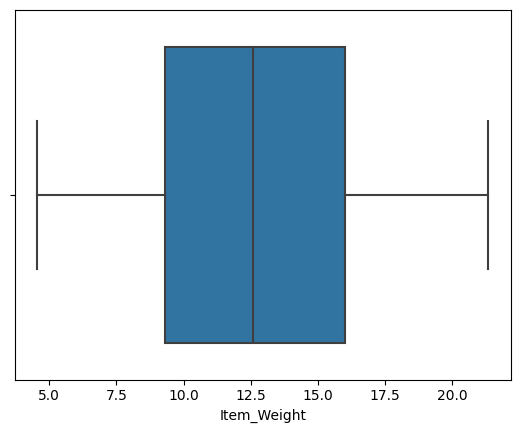

In [43]:
## Define a MatplotLib ax object using seaborn.boxplot()
# Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Weight')

- There are no outliers and the median Item Weight is 12.6, this appears to be evenly distributed.

###'Item Visibility' Column

- 'Item Visibility' Histogram

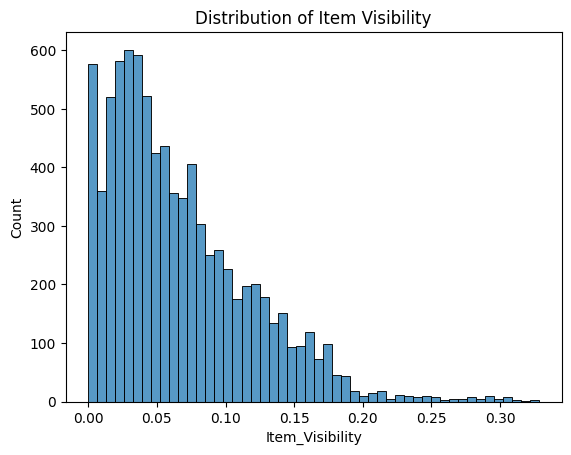

In [44]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='Item_Visibility')
# Add a title
ax.set_title('Distribution of Item Visibility');

- 'Item Visibility' Boxplot

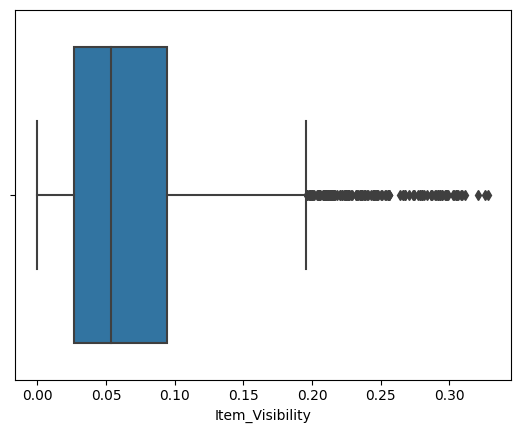

In [45]:
## Define a MatplotLib ax object using seaborn.boxplot()
# Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Visibility')

- There are several outliers on the high side and this is skewed to the high side.

###'Item MRP' Column

- 'Item MRP' Histogram

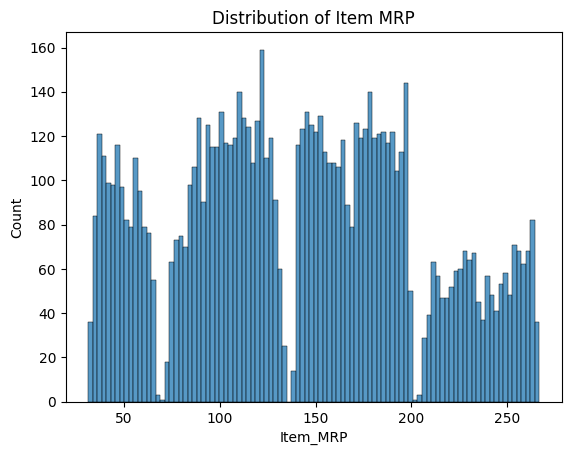

In [46]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='Item_MRP',
                  bins= 100)
# Add a title
ax.set_title('Distribution of Item MRP');

- 'Item MRP' Boxplot

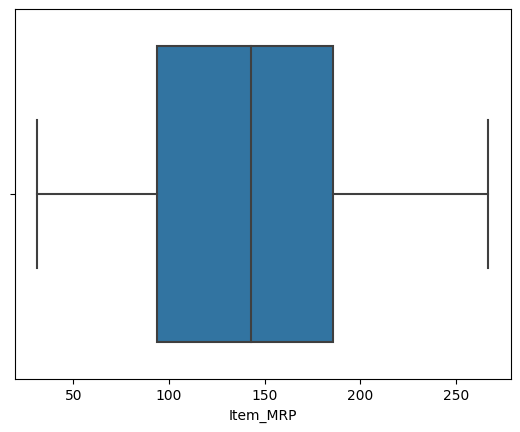

In [47]:
## Define a MatplotLib ax object using seaborn.boxplot()
# Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_MRP')

- There are no outliers.

###'Item Outlet Sales' Column

- 'Item Outlet Sales' Histogram

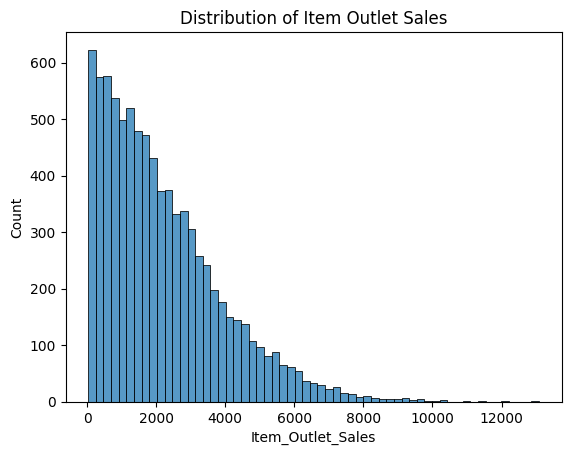

In [48]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='Item_Outlet_Sales')
# Add a title
ax.set_title('Distribution of Item Outlet Sales');

- 'Item Outlet Sales' Boxplot

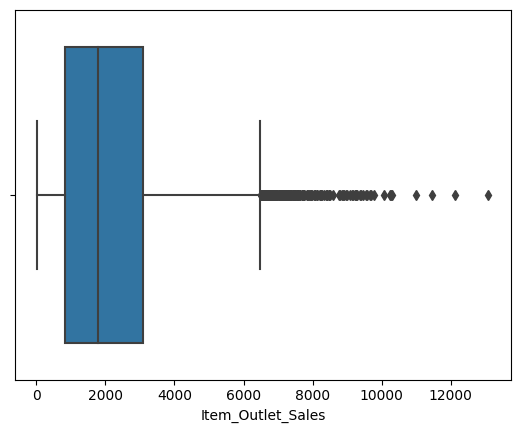

In [49]:
## Define a MatplotLib ax object using seaborn.boxplot()
# Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Outlet_Sales')

- There appears to be a significant number of outliers on the high side and this is skewed to the high side.

##Categorical Columns

- For each categorical column we will display the value counts, descriptive statistics, and a bar plot to visualize the data.

###'Item Fat Content' Column

In [50]:
#Display the value counts for the column
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [51]:
#Display the normalized value counts for the column
df['Item_Fat_Content'].value_counts(normalize = True)

Low Fat    0.647307
Regular    0.352693
Name: Item_Fat_Content, dtype: float64

In [52]:
#Display the descriptive statistics for the column
df['Item_Fat_Content'].describe()

count        8523
unique          2
top       Low Fat
freq         5517
Name: Item_Fat_Content, dtype: object

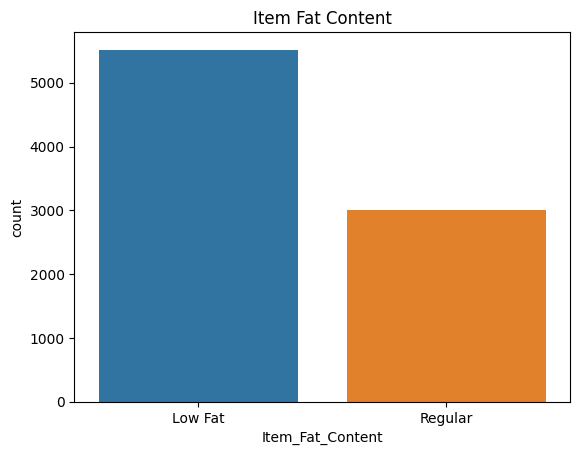

In [53]:
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='Item_Fat_Content')
## Set the Title
ax.set_title('Item Fat Content');

###'Item Type' Column

In [54]:
#Display the value counts for the column
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [55]:
#Display the normalized value counts for the column
df['Item_Type'].value_counts(normalize = True)

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

In [56]:
#Display the descriptive statistics for the column
df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

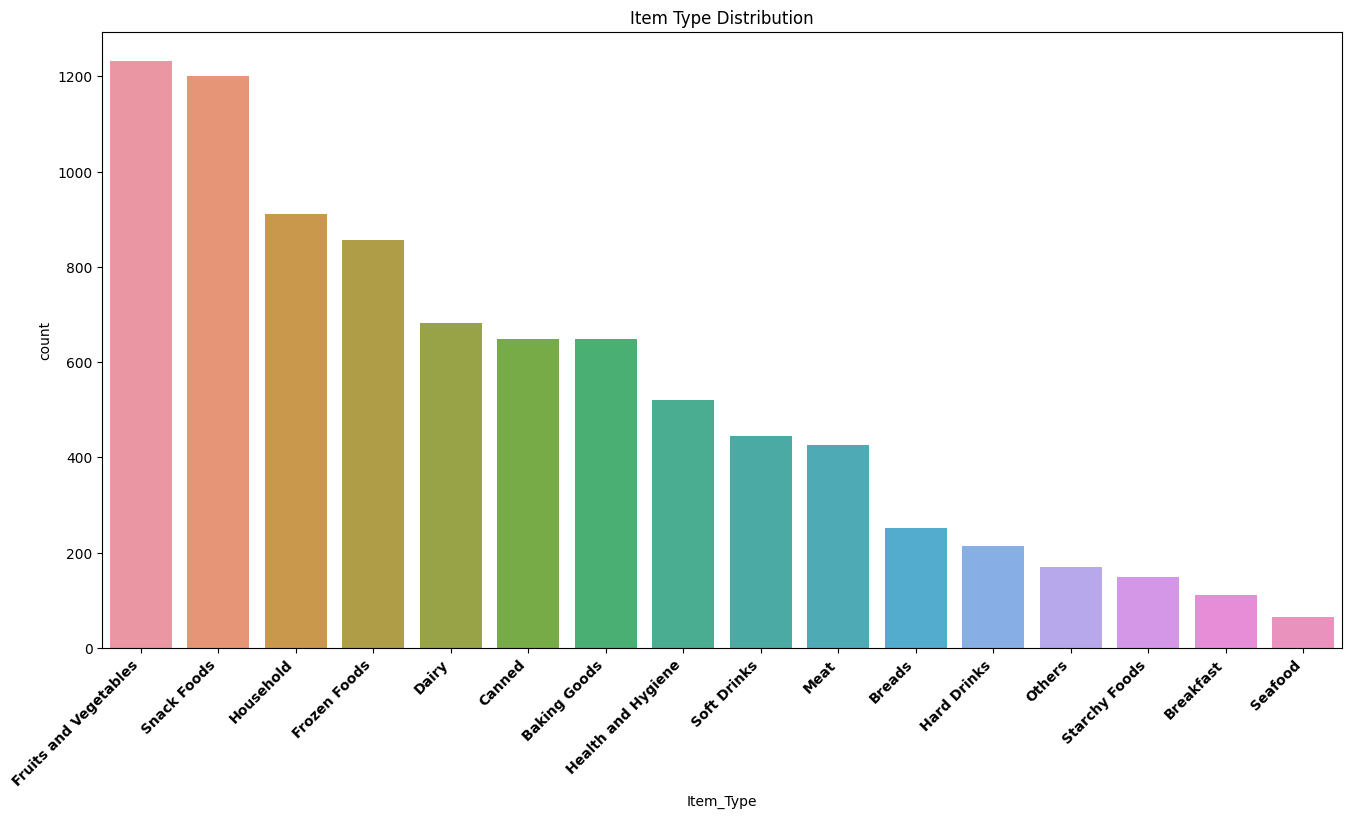

<Figure size 600x300 with 0 Axes>

In [57]:
## Define the label order
label_order = df['Item_Type'].value_counts().index
plt.figure(figsize= (16, 8))
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='Item_Type', 
                   order = label_order)
#rotate the x-axis labels so they do not overlap
plt.xticks(fontsize=10, weight='bold', rotation=45, ha="right")
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 75)
plt.figure(figsize= (6, 3))
## Set the Title
ax.set_title('Item Type Distribution');

###'Outlet Identifier' Column

In [58]:
#Display the value counts for the column
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [59]:
#Display the normalized value counts for the column
df['Outlet_Identifier'].value_counts(normalize = True)

OUT027    0.109703
OUT013    0.109351
OUT049    0.109117
OUT046    0.109117
OUT035    0.109117
OUT045    0.108999
OUT018    0.108882
OUT017    0.108647
OUT010    0.065118
OUT019    0.061950
Name: Outlet_Identifier, dtype: float64

In [60]:
#Display the descriptive statistics for the column
df['Outlet_Identifier'].describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

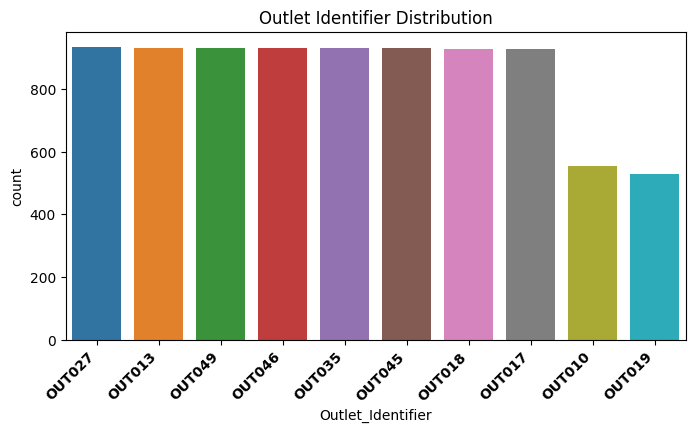

In [61]:
## Define the label order
label_order = df['Outlet_Identifier'].value_counts().index
plt.figure(figsize= (8, 4))
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='Outlet_Identifier', 
                   order = label_order)
#rotate the x-axis labels so they do not overlap
plt.xticks(fontsize=10, weight='bold', rotation=45, ha="right")
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
## Set the Title
ax.set_title('Outlet Identifier Distribution');

### 'Outlet Size' Column

In [62]:
#Display the value counts for the column
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [63]:
#Display the normalized value counts for the column
df['Outlet_Size'].value_counts(normalize = True)

Medium     0.327702
Unknown    0.282764
Small      0.280183
High       0.109351
Name: Outlet_Size, dtype: float64

In [64]:
#Display the descriptive statistics for the column
df['Outlet_Size'].describe()

count       8523
unique         4
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

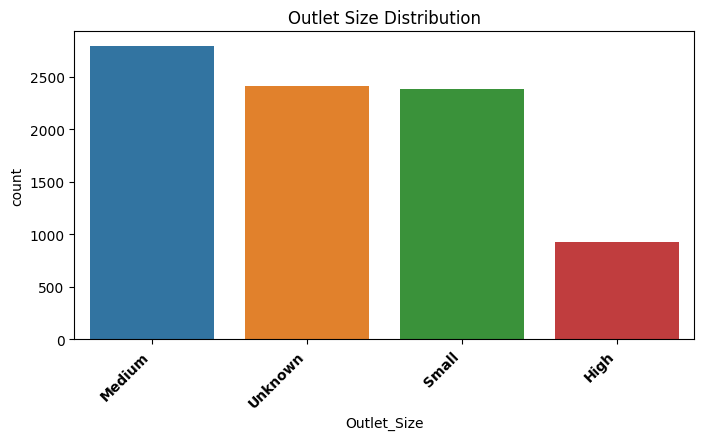

In [65]:
## Define the label order
label_order = df['Outlet_Size'].value_counts().index
plt.figure(figsize= (8, 4))
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='Outlet_Size', 
                   order = label_order)
#rotate the x-axis labels so they do not overlap
plt.xticks(fontsize=10, weight='bold', rotation=45, ha="right")
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
## Set the Title
ax.set_title('Outlet Size Distribution');

###'Outlet Location Type' Column

In [66]:
#Display the value counts for the column
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [67]:
#Display the normalized value counts for the column
df['Outlet_Location_Type'].value_counts(normalize = True)

Tier 3    0.393054
Tier 2    0.326763
Tier 1    0.280183
Name: Outlet_Location_Type, dtype: float64

In [68]:
#Display the descriptive statistics for the column
df['Outlet_Location_Type'].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

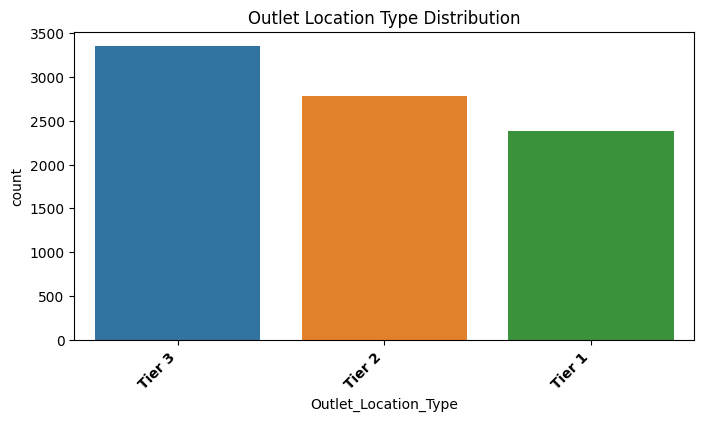

In [69]:
## Define the label order
label_order = df['Outlet_Location_Type'].value_counts().index
plt.figure(figsize= (8, 4))
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='Outlet_Location_Type', 
                   order = label_order)
#rotate the x-axis labels so they do not overlap
plt.xticks(fontsize=10, weight='bold', rotation=45, ha="right")
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
## Set the Title
ax.set_title('Outlet Location Type Distribution');

###'Outlet Type' Column

In [70]:
#Display the value counts for the column
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [71]:
#Display the normalized value counts for the column
df['Outlet_Type'].value_counts(normalize = True)

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

In [72]:
#Display the descriptive statistics for the column
df['Outlet_Type'].describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

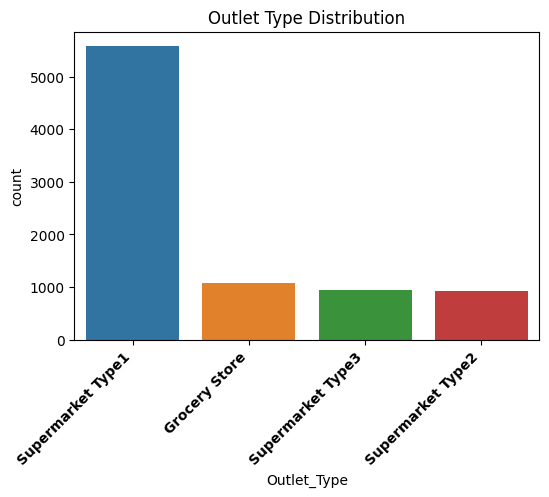

In [73]:
## Define the label order
label_order = df['Outlet_Type'].value_counts().index
plt.figure(figsize= (6, 4))
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='Outlet_Type', 
                   order = label_order)
#rotate the x-axis labels so they do not overlap
plt.xticks(fontsize=10, weight='bold', rotation=45, ha="right")
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
## Set the Title
ax.set_title('Outlet Type Distribution');

##Heatmap of the correlation between features.

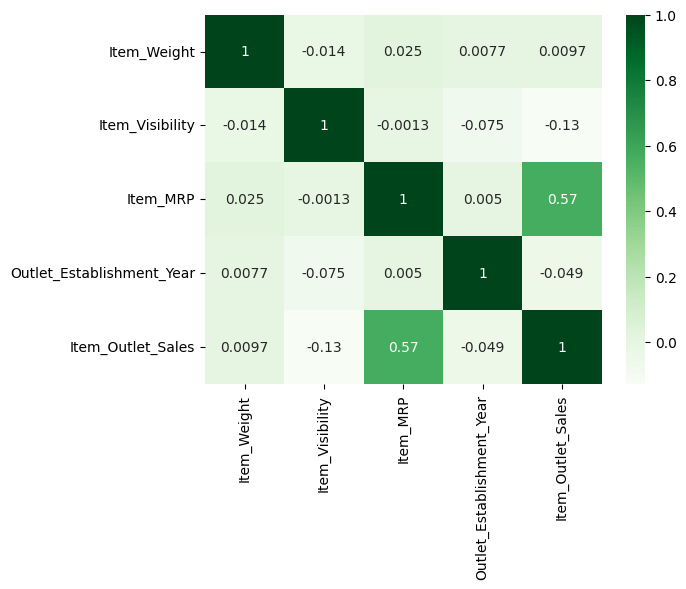

In [74]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True) ;

- Item MRP has the highest correlation to Item Outlet Sales.

#**Explanatory Data Analysis**


###1. How does Item MRP affect Item Outlet Sales?

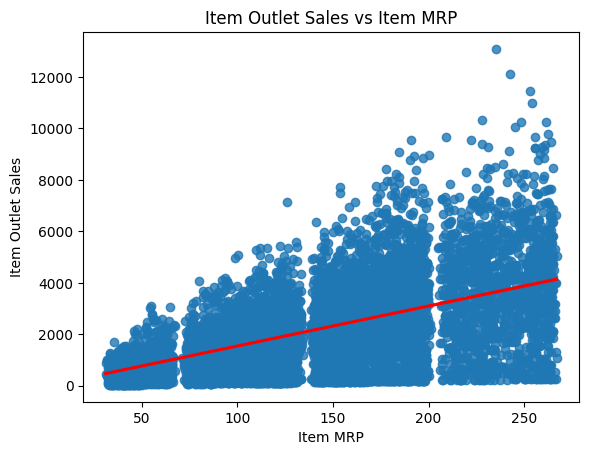

In [75]:
## Define a MatplotLib ax object using sns.regplot()
## Use y= to plot the y axis (vertical) values
## Use x= to plot the x axis (horizontal)  values
ax = sns.regplot(x ='Item_MRP', y = 'Item_Outlet_Sales', data = df, line_kws = {'color':'red'})
## Set the Title
ax.set_title('Item Outlet Sales vs Item MRP')
# Set Axes Labels
ax.set_xlabel('Item MRP')
ax.set_ylabel('Item Outlet Sales')
plt.show()

- There is a positive correlation between Item Outlet Sales and Item MRP.  As the list price or Item MRP increases, the Item Outlet Sales increases.  

###2. Is there a correlation between Item Outlet Sales and Item Fat Content? 

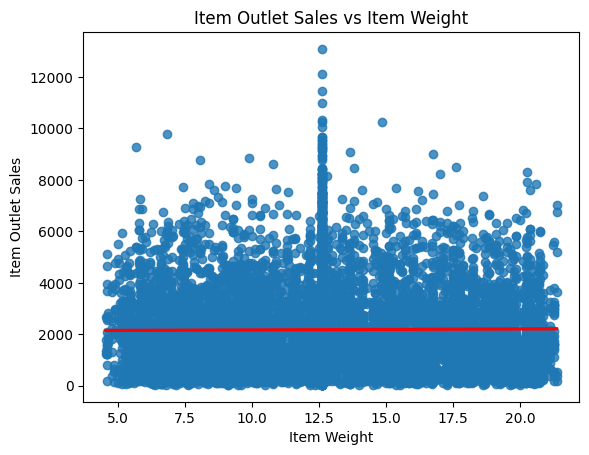

In [76]:
## Define a MatplotLib ax object using sns.regplot()
## Use y= to plot the y axis (vertical) values
## Use x= to plot the x axis (horizontal)  values
ax = sns.regplot(x ='Item_Weight', y = 'Item_Outlet_Sales', data = df, line_kws = {'color':'red'})
## Set the Title
ax.set_title('Item Outlet Sales vs Item Weight')
# Set Axes Labels
ax.set_xlabel('Item Weight')
ax.set_ylabel('Item Outlet Sales')
plt.show()

- There is no correlation as the regression line is flat.

###3.  Which Item type has the most sales?

In [95]:
df['Item_Type'].value_counts(normalize=True)

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

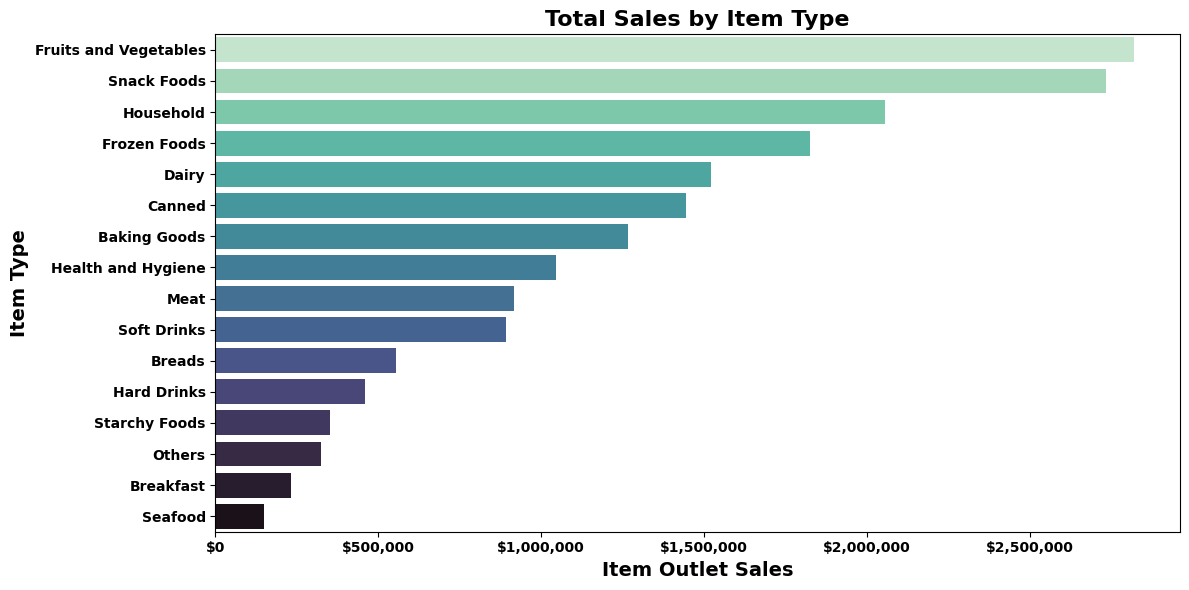

In [129]:
# Set Color palette
colors = sns.color_palette("mako_r", n_colors=len(df_sorted))
    
df_sorted = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_sorted,
                 x='Item_Outlet_Sales',
                 y='Item_Type', 
                 order=df_sorted['Item_Type'], 
                 palette=colors)
ax.set_ylabel('Item Type', fontsize=14, weight='bold')
ax.set_xlabel('Item Outlet Sales', fontsize=14, weight='bold')
ax.set_title('Total Sales by Item Type', fontsize=16, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
price_fmt = StrMethodFormatter("${x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)
plt.tight_layout()

- Fruits and Vegetables has the highest sales with Seafood being the least sales.

###4. Which outlet size had the most sales?

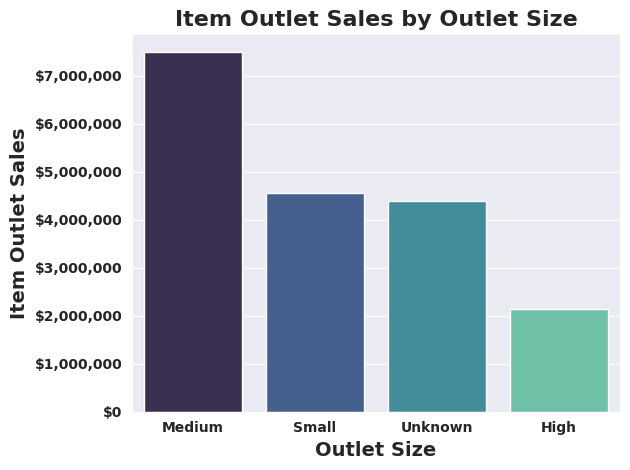

In [140]:
# groupby and sort values by Item_Outlet_Sales
df_sorted = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales', ascending=False)
# create barplot
ax = sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_sorted, palette='mako')
ax.set_title('Item Outlet Sales by Outlet Size', fontsize=16, weight='bold')
ax.set_xlabel('Outlet Size', fontsize=14, weight='bold')
ax.set_ylabel('Item Outlet Sales', fontsize=14, weight='bold')
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
price_fmt = StrMethodFormatter("${x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.tight_layout()
plt.show()

- Medium outlet size had the most item outlet sales with High being the least.

###5. Which Item Fat Content sold the most? 

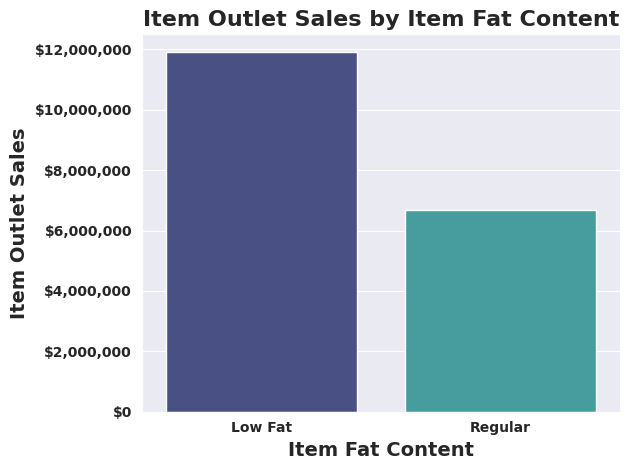

In [141]:
# groupby and sort values by Item_Outlet_Sales
df_sorted = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales', ascending=False)
# create barplot
ax = sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df_sorted, palette='mako')
ax.set_title('Item Outlet Sales by Item Fat Content', fontsize=16, weight='bold')
ax.set_xlabel('Item Fat Content', fontsize=14, weight='bold')
ax.set_ylabel('Item Outlet Sales', fontsize=14, weight='bold')
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
price_fmt = StrMethodFormatter("${x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.tight_layout()
plt.show()

- Low Fat items sold the most at nearly $12,000,000 in total sales.  

###6. Does item visibility affect sales?

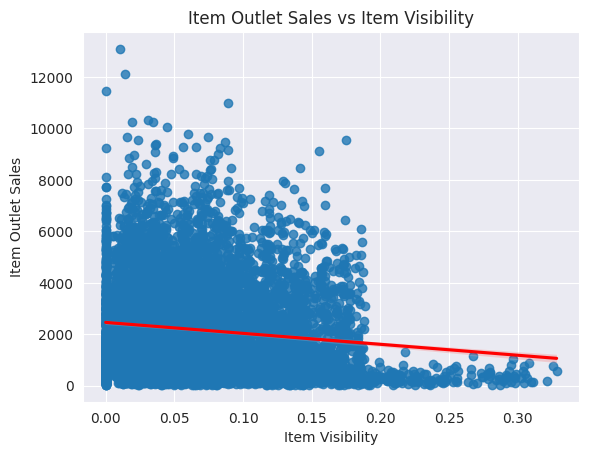

In [143]:
## Define a MatplotLib ax object using sns.regplot()
## Use y= to plot the y axis (vertical) values
## Use x= to plot the x axis (horizontal)  values
ax = sns.regplot(x ='Item_Visibility', y = 'Item_Outlet_Sales', data = df, line_kws = {'color':'red'})
## Set the Title
ax.set_title('Item Outlet Sales vs Item Visibility')
# Set Axes Labels
ax.set_xlabel('Item Visibility')
ax.set_ylabel('Item Outlet Sales')
plt.show()

- There is a weak negative correlation between item visibility and item outlet sales.  Per the heat map above the correlation is -.13 which is considered weak. 